In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('sat.csv')

In [3]:
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
x = df['SAT']

In [5]:
x

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [6]:
y = df['GPA']

In [7]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

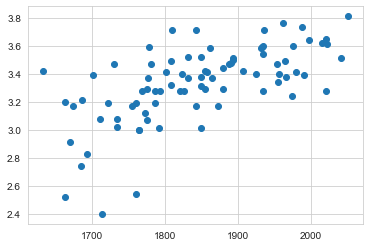

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

In [11]:
model = Sequential([
    Dense(10,activation='relu',input_shape=[1],kernel_regularizer=keras.regularizers.l2(0.1)),
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(loss='mean_squared_error',optimizer=optimizer)

In [14]:
model.fit(x,y,epochs=50)

Epoch 1/50
3/3 [==============================] - 2s 6ms/step - loss: 276440.3125
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 265747.5938
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 258455.3594
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 252322.1250
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 246601.2812
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 241479.6406
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 236388.0781
Epoch 8/50
3/3 [==============================] - 0s 7ms/step - loss: 231510.1406
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 226791.3594
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 222365.1875
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 217611.0469
Epoch 12/50
3/3 [==============================] - 0s 9ms/step - loss: 213468.2812
Epoch 13/50
3

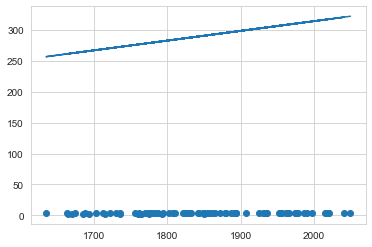

In [15]:
plt.scatter(x,y)
plt.plot(x,model.predict(x))
plt.show()